Імпорт необхідних бібліотек

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist #з цим вбудованим у keras датасетом будемо працювати
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten

import tensorflow as tf
import ssl

np.random.seed(0)

Завантаження даних і їх поділ на трейнові і тестові

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#З документації, датасет ділиться у співвідношенні 6:1 (або 85.7% на навчання і 14.3% на тестування)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Перевірка розмірів датасету

In [ ]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))
#This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


Дані співпадають з документованими, співвідношення train/test = 6:1

Зобразимо перші n цифр (n=64)

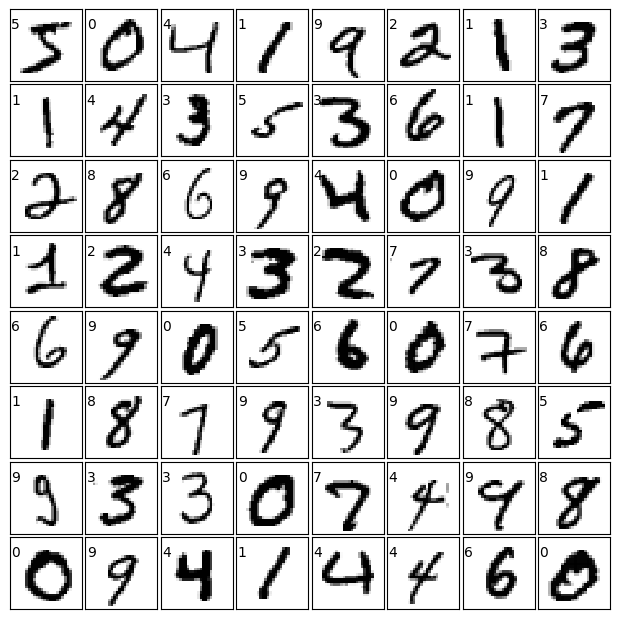

In [ ]:
#Параметризуємо через константи для кращої універсальності
first_n_digits = 64
const_figsize = 6 #розміри загальної фігури = const_figsize х const_figsize
n_rows = 8
n_cols = 8


# set up the figure
fig = plt.figure(figsize=(const_figsize, const_figsize))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) #відступи графіків у межах фігури

# plot the digits: each image is 28x28 pixels
for i in range(first_n_digits):
    ax = fig.add_subplot(n_rows, n_cols, i + 1, xticks=[], yticks=[]) # створюється підграфік на позиції i+1
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest') # відображення зображення на підграфіку

    # label the image with the target value
    ax.text(0, 7, str(y_train[i])) #проставлення міток

In [ ]:
#Побудова моделі методом послідовного класу
#Для автономності комірки проводиться  ще раз завантаження датасету

#Модифікуємо стартову функцію, щоб мати можливість застосовувати різні активаційні функції

import tensorflow as tf

def neural_network_sequential (activation_func='relu'):
  #Завантаження MNIST і поділ на тестові і трейнові дані
  mnist = tf.keras.datasets.mnist #Завантаження MNIST
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0 #Нормалізація датасету

  # Побудова моделі
  model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)), #перетворення вхідних зображень у вектор (layer1)
          tf.keras.layers.Dense(128, activation=activation_func), # використовуємо активаційну функцію  для додавання нелінійності (layer2)
          tf.keras.layers.Dropout(0.2), #"відключення" 20% нейронів під час навчання для запобігання overfitting (layer3)
          tf.keras.layers.Dense(10)  #вихідний шар з 10 нейронами, оскільки є 10 класів (layer4)
      ])

  # Визначення функції втрат SparseCategoricalCrossentropy, яка обчислює відмінність між передбаченнями та мітками класів
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy']) #вибрали оптимізатор ('adam') і метрику оцінки моделі (Accuracy)

  # Тренування моделі
  model.fit(x_train, y_train, epochs=5) # Модель проходить через увесь тренувальний датасет 5 разів (тренування на 5 епохах)

  # Оцінка моделі
  model.evaluate(x_test, y_test, verbose=2)



In [ ]:
neural_network_sequential(activation_func='relu')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8572 - loss: 0.4846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9544 - loss: 0.1535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9673 - loss: 0.1057
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9742 - loss: 0.0862
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0685
313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0757


Як бачимо з результатів, після тренування на епохах 5 досягнуто показника Accuracy > 97%

Було застосовано нейронну модель з 4 шарами (2 приховані) з активаційною функцією ReLU.

Перевіримо чи інші активаційні функції не є кращими для моделі

In [ ]:
neural_network_sequential(activation_func='sigmoid')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8005 - loss: 0.7265
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9264 - loss: 0.2484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9472 - loss: 0.1810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9571 - loss: 0.1434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9635 - loss: 0.1234
313/313 - 1s - 2ms/step - accuracy: 0.9697 - loss: 0.1003


In [ ]:
neural_network_sequential(activation_func='tanh')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8657 - loss: 0.4647
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9438 - loss: 0.1944
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9567 - loss: 0.1462
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9634 - loss: 0.1195
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9699 - loss: 0.1003
313/313 - 1s - 2ms/step - accuracy: 0.9720 - loss: 0.0903


In [ ]:
neural_network_sequential(activation_func='elu') #Функція активації ELU (Exponential Linear Unit)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.4751
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9432 - loss: 0.1930
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9576 - loss: 0.1382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.1073
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9719 - loss: 0.0899
313/313 - 1s - 2ms/step - accuracy: 0.9752 - loss: 0.0799


In [ ]:
neural_network_sequential(activation_func=tf.keras.activations.swish) #Функція Swish

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8595 - loss: 0.4790
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9571 - loss: 0.1484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9707 - loss: 0.0989
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9767 - loss: 0.0752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9803 - loss: 0.0617
313/313 - 1s - 2ms/step - accuracy: 0.9764 - loss: 0.0788


Проведено невелике дослідження ефективності активаційних функцій при інших однакових умовах: найкращі результати у ReLU, elu та Swish (після 5 епох Accuracy > 97.5%)


Модифікація цієї нейронної мережі через функціональне API



In [ ]:
import tensorflow as tf

def neural_network_functional(activation_func='relu'):
    # Завантаження MNIST і поділ на тестові і трейнові дані
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормалізація датасету

    # Побудова моделі через функціональне API
    inputs = tf.keras.Input(shape=(28, 28), name='input_layer')  # Вхідний шар
    x = tf.keras.layers.Flatten(name='flatten_layer')(inputs)  # Перетворення у вектор
    x = tf.keras.layers.Dense(128, activation=activation_func, name='dense_layer_1')(x)  # Прихований шар
    x = tf.keras.layers.Dropout(0.2, name='dropout_layer')(x)  # Dropout для регуляризації
    outputs = tf.keras.layers.Dense(10, name='output_layer')(x)  # Вихідний шар із 10 класами

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')  # Створення моделі

    # Визначення функції втрат
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])  # Компіляція моделі

    # Тренування моделі
    model.fit(x_train, y_train, epochs=5)  # Тренування на 5 епохах

    # Оцінка моделі
    model.evaluate(x_test, y_test, verbose=2)  # Тестування на тестовому наборі

    return model

In [ ]:
neural_network_functional(activation_func='relu')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8613 - loss: 0.4740
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9543 - loss: 0.1519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9678 - loss: 0.1099
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9714 - loss: 0.0904
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9772 - loss: 0.0725
313/313 - 1s - 2ms/step - accuracy: 0.9766 - loss: 0.0743


<Functional name=mnist_model, built=True>

Показали, що результати моделі аналогічні